In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_excel('./Phase 1 Dataset Hackathon.xlsx')

In [3]:
train_df.head()

,Category Name,Unit,Price
0,Leather Safety Gloves,Pair,10
1,Leather Safety Gloves,Pair,12
2,Leather Safety Gloves,Pair,12
3,Leather Safety Gloves,Pair,20
4,Leather Safety Gloves,Pair,23


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
Category Name    144 non-null object
Unit             144 non-null object
Price            144 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.5+ KB


In [5]:
train_df['Unit'].unique()

array(['Pair', 'Piece', 'pack', 'Unit', 'Pack', 'Unit/Onwards', 'Pair(s)',
       'unit', 'Set', 'Pieces'], dtype=object)

In [6]:
train_df = train_df.drop("Category Name", axis=1)

In [7]:
pair = ['Pair', 'Pair(s)']
piece = ['Piece', 'Pieces']
pack = ['pack', 'Pack']
unit = ['Unit', 'Unit/Onwards', 'unit']
set_ = ['Set']

split_df = []
split_df.append(train_df[train_df.Unit.isin(pair)])
split_df.append(train_df[train_df.Unit.isin(piece)])
split_df.append(train_df[train_df.Unit.isin(pack)])
split_df.append(train_df[train_df.Unit.isin(unit)])
split_df.append(train_df[train_df.Unit.isin(set_)])
split_df[3].head()

,Unit,Price
52,Unit,70
74,Unit,100
77,Unit/Onwards,100
126,unit,366
131,unit,785


In [8]:
for idx in range(len(split_df)):
    split_df[idx] = split_df[idx].assign(Index = np.asarray(list(range(0, len(split_df[idx])))))

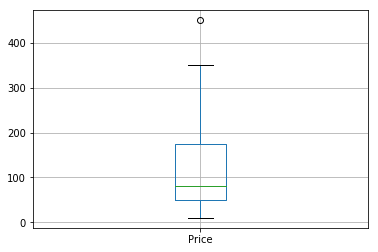

In [10]:
# box plot to test Normality assumption of distribution
split_df[0].boxplot('Price')

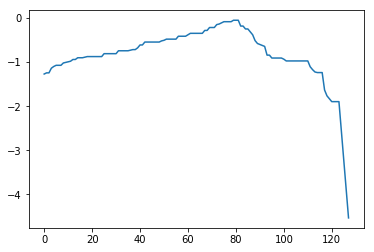

In [12]:
# Plot of Z-scores
test = (split_df[0].Price - split_df[0].Price.mean())/split_df[0].Price.std()
(-np.abs(test)).plot.line()

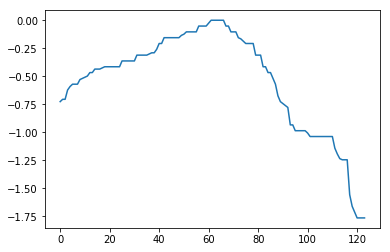

In [16]:
# Plot of modified Z-scores
MAD = np.median(np.abs(split_df[0].Price - split_df[0].Price.median())) # median absolute deviation
test = 0.6745*(split_df[0].Price - split_df[0].Price.median())/split_df[0].Price.std()
(-np.abs(test)).plot.line()

In [14]:
for idx, df in enumerate(split_df):
    MAD = np.median(np.abs(df.Price - df.Price.median()))
    test = 0.6745*(df.Price - df.Price.median())/df.Price.std()
#     if idx == 3:
#         print(split_df[idx].tail)
    split_df[idx] = df[(test <= 1.52) & (test >= -1.52)]
#     if idx == 3:
#         print(split_df[idx].tail)

In [16]:
# df = split_df[3]
# MAD = np.median(np.abs(df.Price - df.Price.median()))
# test = 0.6745*(df.Price - df.Price.median())/df.Price.std()
# df['Z-score'] = test
# df
# # split_df[3]# = df[(test <= 1.52) & (test >= -1.52)]

In [ ]:
# Univariate Method
# Choose a cleaning parameter (cp)
# Reject all the values which lie outside the range (median - cp, median + cp)

In [ ]:
# Multivariate Method
# Train a model and calculate error for all values
# Choose a acceptable error (ae)
# Reject all the values having error
# in the range (0 - ae, 0 + ae)

In [ ]:
# Problem: Univariate (single feature: price) point (single data pts lying far from dist.) outliers